In [2]:
import pandas as pd
import os
import warnings

%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [4]:
path = r"C:\Users\Mehar Unissa\Desktop\data/"
filename = "0-999.csv"
print ("Reading the data")
spotify_data = pd.read_csv(os.path.join(path,filename),escapechar= '.',error_bad_lines = False,warn_bad_lines=False)
print ("Reading the data")
spotify_data = pd.read_csv(os.path.join(path,filename),escapechar= '.',error_bad_lines = False,warn_bad_lines=False)
print ("Read Succesful with shape {}".format(spotify_data.shape))
spotify_data.columns = ['user_id','artistname','trackname','playlistname']

Reading the data
Reading the data
Read Succesful with shape (66661, 4)


In [5]:
print ("Some General statistics about data are as follows:",spotify_data.info())
print ("Lets look at the summary stats about the data :",spotify_data.describe(include ='object'))
print ("The number of rows in the datasets are as follows :",spotify_data.shape[0])
print (" The columns in the data are as follows :",spotify_data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66661 entries, 0 to 66660
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       66661 non-null  object 
 1   artistname    66661 non-null  object 
 2   trackname     66659 non-null  object 
 3   playlistname  65761 non-null  float64
dtypes: float64(1), object(3)
memory usage: 2.0+ MB
Some General statistics about data are as follows: None
Lets look at the summary stats about the data :                                      user_id artistname trackname
count                                  66661      66661     66659
unique                                 34189       9827     30216
top     spotify:track:1xznGGDReH1oQq0xzbwXa3      Drake    Closer
freq                                      55        938        74
The number of rows in the datasets are as follows : 66661
 The columns in the data are as follows : Index(['user_id', 'artistname', 'trackname', 'pl

<IPython.core.display.Javascript object>


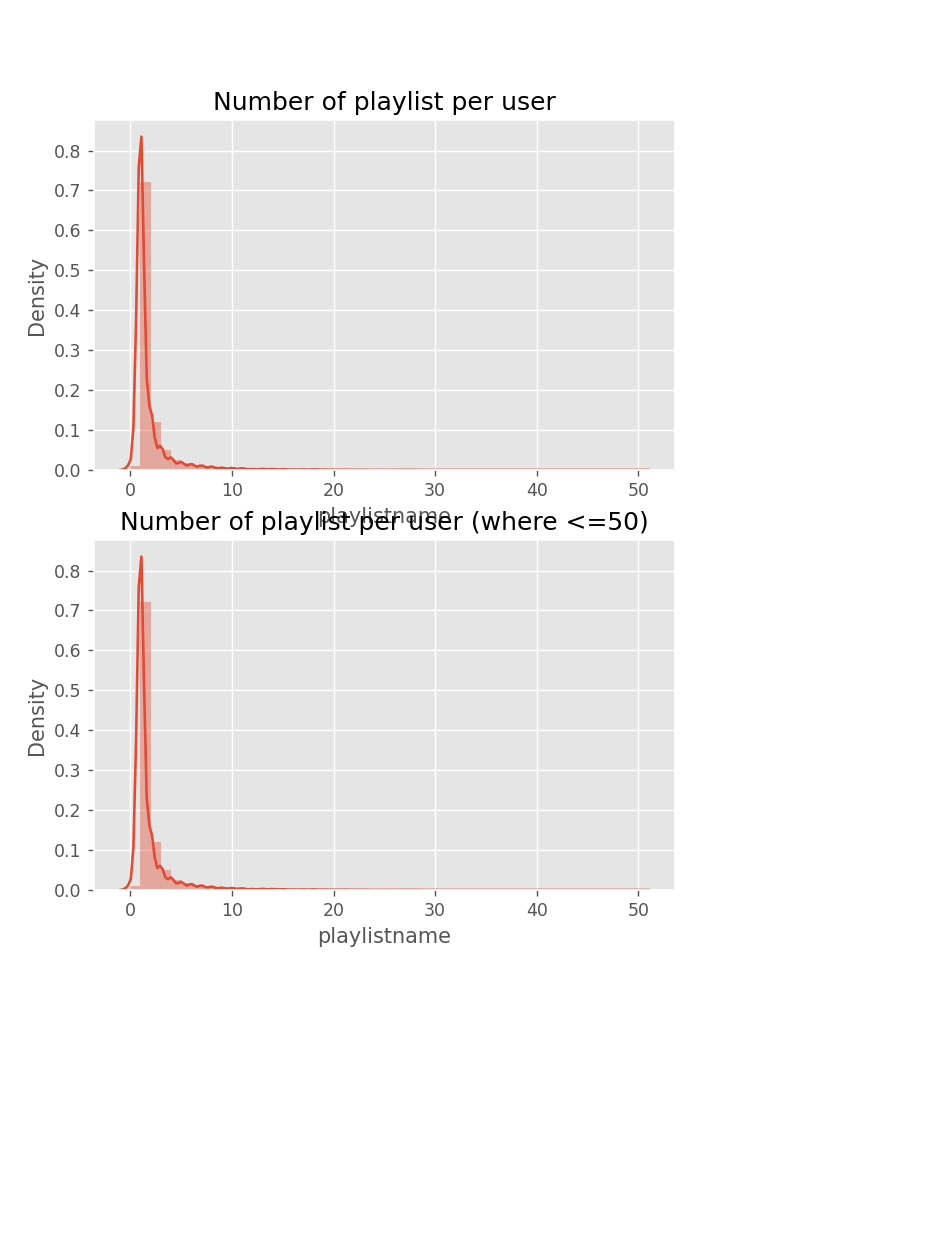

In [6]:
spotify_user_summary = spotify_data.groupby(['user_id'])["playlistname"].nunique().reset_index()
fig, ax = plt.subplots(2, figsize=(6,8))
sns.distplot(spotify_user_summary['playlistname'], hist=True,ax = ax[0])
ax[0].set_title("Number of playlist per user")
spotify_user_summary = spotify_user_summary[spotify_user_summary['playlistname'] <= 50]
sns.distplot(spotify_user_summary['playlistname'], hist=True,ax=ax[1])
ax[1].set_title("Number of playlist per user (where <=50)")
plt.show()

<IPython.core.display.Javascript object>


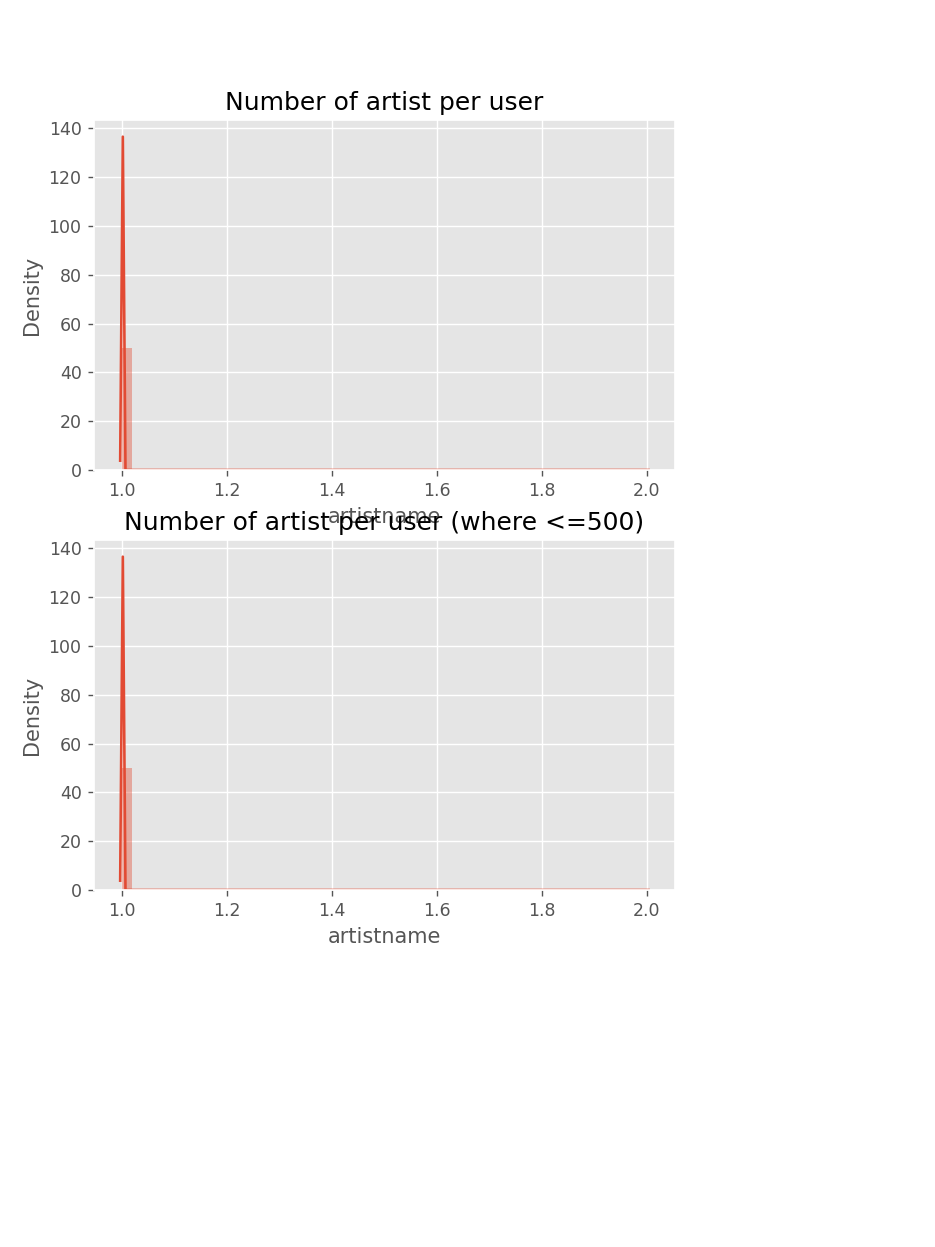

In [7]:
spotify_user_summary = spotify_data.groupby(['user_id'])["artistname"].nunique().reset_index()
fig, ax = plt.subplots(2, figsize=(6,8))
sns.distplot(spotify_user_summary["artistname"], hist=True,ax = ax[0])
ax[0].set_title("Number of artist per user")
spotify_user_summary = spotify_user_summary[spotify_user_summary["artistname"] <= 500]
sns.distplot(spotify_user_summary["artistname"], hist=True,ax=ax[1])
ax[1].set_title("Number of artist per user (where <=500)")
plt.show()

<IPython.core.display.Javascript object>


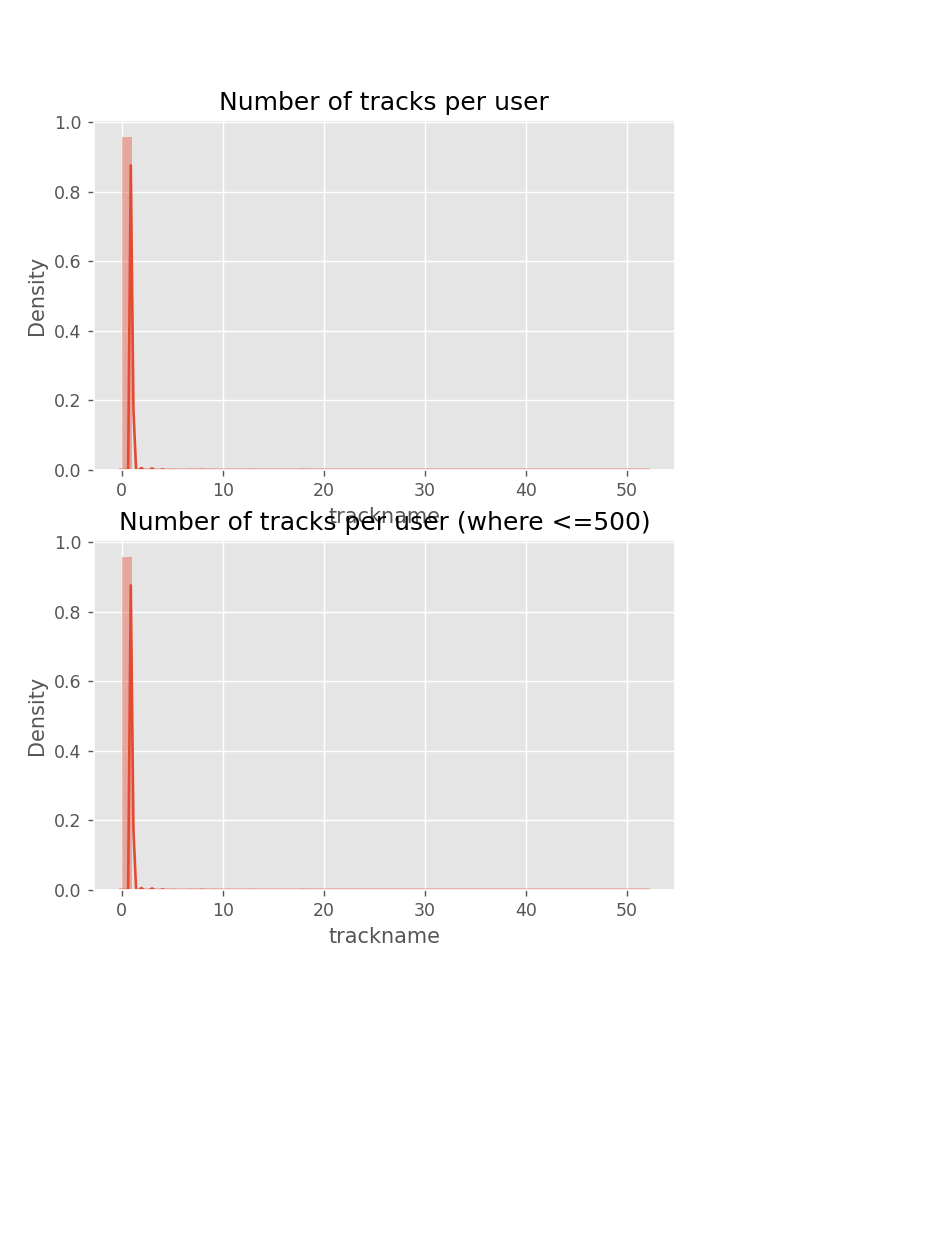

In [8]:
spotify_user_summary = spotify_data.groupby(['user_id'])["trackname"].nunique().reset_index()
fig, ax = plt.subplots(2, figsize=(6,8))
sns.distplot(spotify_user_summary["trackname"], hist=True,ax = ax[0])
ax[0].set_title("Number of tracks per user")
spotify_user_summary = spotify_user_summary[spotify_user_summary["trackname"] <= 500]
sns.distplot(spotify_user_summary["trackname"], hist=True,ax=ax[1])
ax[1].set_title("Number of tracks per user (where <=500)")
plt.show()

<AxesSubplot:title={'center':'Top 50 Most Popular Artist '}>

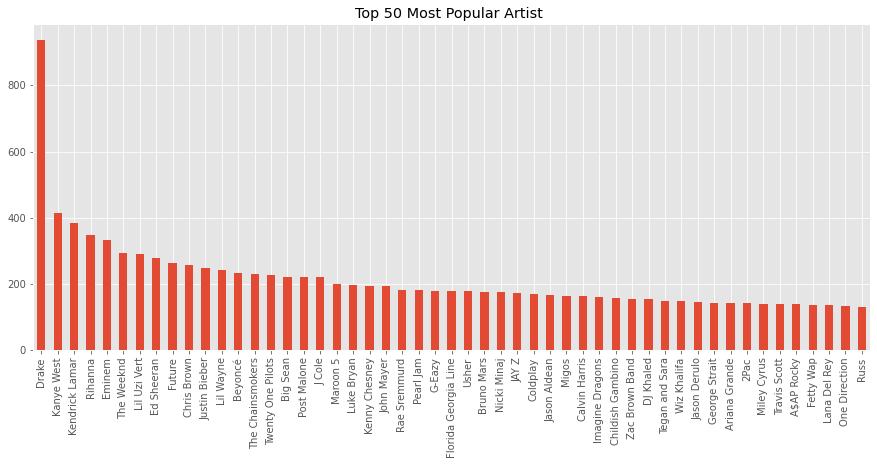

In [9]:
%matplotlib inline
spotify_data['artistname'].value_counts()[0:51].plot(kind= 'bar',title="Top 50 Most Popular Artist ",figsize = (15,6))